<a href="https://colab.research.google.com/github/accenggg/data-mining/blob/main/063_Michael_Arselius_P_Postest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [4]:
with open ('dataset_market_basket.txt') as file:
  raw_data = file.read()

In [5]:
data = raw_data.split('\n')

In [6]:
dataset = [item.split(",") for item in data]

In [7]:
# mengubah list of lists menjadi satu list tunggal
items = [item for sublist in dataset for item in sublist]

# membuat set unik dari items
unique_items = set(items)

# menghitung frekuensi setiap jenis item pada setiap baris dalam dataset
tabular_data = []
for row in dataset:
    row_data = {}
    for item in unique_items:
        row_data[item] = row.count(item)
    tabular_data.append(row_data)

# membuat tabel tabular menggunakan pandas DataFrame
df = pd.DataFrame(tabular_data)
df

,cling film/bags,dental care,whipped/sour cream,sugar,soda,hygiene articles,misc. beverages,butter milk,white bread,beef,...,curd,semi-finished bread,rolls/buns,frozen vegetables,sausage,detergent,butter,other vegetables,frozen meals,pastry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from itertools import permutations
# ekstark uniq item
rules = list(permutations(df.columns, 2))

In [9]:
hitung = []
for rule in rules:
  banyak_data = len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
  ])
  hitung.append(banyak_data)

In [10]:
# list support
supports = [i/len(df)*100 for i in hitung]
for i, (rule, support) in enumerate(zip(rules, supports)):
    print(f"{i+1}. {rule[0]} -> {rule[1]}, supports: {support}%")

1. cling film/bags -> dental care, supports: 0.0%
2. cling film/bags -> whipped/sour cream, supports: 0.0%
3. cling film/bags -> sugar, supports: 0.0%
4. cling film/bags -> soda, supports: 0.0%
5. cling film/bags -> hygiene articles, supports: 0.0%
6. cling film/bags -> misc. beverages, supports: 0.0%
7. cling film/bags -> butter milk, supports: 0.0%
8. cling film/bags -> white bread, supports: 0.0%
9. cling film/bags -> beef, supports: 0.0%
10. cling film/bags -> salty snack, supports: 0.0%
11. cling film/bags -> frankfurter, supports: 0.0%
12. cling film/bags -> tropical fruit, supports: 0.0%
13. cling film/bags -> canned beer, supports: 0.0%
14. cling film/bags -> specialty chocolate, supports: 0.0%
15. cling film/bags -> pickled vegetables, supports: 0.0%
16. cling film/bags -> yogurt, supports: 0.0%
17. cling film/bags -> root vegetables, supports: 0.0%
18. cling film/bags -> whole milk, supports: 0.0%
19. cling film/bags -> dish cleaner, supports: 5.263157894736842%
20. cling fil

In [11]:
# list support diatas 5%
for i, (rule, support) in enumerate(zip(rules, supports)):
  if support > 5:
    print(f"{i+1}. {rule[0]} -> {rule[1]}, supports: {support}%")

19. cling film/bags -> dish cleaner, supports: 5.263157894736842%
57. dental care -> frozen meals, supports: 5.263157894736842%
62. whipped/sour cream -> soda, supports: 5.263157894736842%
69. whipped/sour cream -> frankfurter, supports: 5.263157894736842%
99. sugar -> tropical fruit, supports: 5.263157894736842%
119. soda -> whipped/sour cream, supports: 5.263157894736842%
127. soda -> frankfurter, supports: 5.263157894736842%
131. soda -> pickled vegetables, supports: 5.263157894736842%
134. soda -> whole milk, supports: 5.263157894736842%
169. hygiene articles -> sausage, supports: 5.263157894736842%
187. misc. beverages -> canned beer, supports: 5.263157894736842%
217. butter milk -> specialty chocolate, supports: 5.263157894736842%
241. white bread -> beef, supports: 5.263157894736842%
270. beef -> white bread, supports: 5.263157894736842%
308. salty snack -> whole milk, supports: 5.263157894736842%
319. salty snack -> pastry, supports: 5.263157894736842%
322. frankfurter -> whipp

In [12]:
# List Confiden
confiden = [ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)]
for i, (rule, confidence) in enumerate(zip(rules, confiden)):
    print(f"{i+1}. {rule[0]} -> {rule[1]}, Confidence: {confidence}%")

1. cling film/bags -> dental care, Confidence: 0.0%
2. cling film/bags -> whipped/sour cream, Confidence: 0.0%
3. cling film/bags -> sugar, Confidence: 0.0%
4. cling film/bags -> soda, Confidence: 0.0%
5. cling film/bags -> hygiene articles, Confidence: 0.0%
6. cling film/bags -> misc. beverages, Confidence: 0.0%
7. cling film/bags -> butter milk, Confidence: 0.0%
8. cling film/bags -> white bread, Confidence: 0.0%
9. cling film/bags -> beef, Confidence: 0.0%
10. cling film/bags -> salty snack, Confidence: 0.0%
11. cling film/bags -> frankfurter, Confidence: 0.0%
12. cling film/bags -> tropical fruit, Confidence: 0.0%
13. cling film/bags -> canned beer, Confidence: 0.0%
14. cling film/bags -> specialty chocolate, Confidence: 0.0%
15. cling film/bags -> pickled vegetables, Confidence: 0.0%
16. cling film/bags -> yogurt, Confidence: 0.0%
17. cling film/bags -> root vegetables, Confidence: 0.0%
18. cling film/bags -> whole milk, Confidence: 0.0%
19. cling film/bags -> dish cleaner, Confid

In [13]:
# list confiden diatas 50%
for i, (rule, confidence) in enumerate(zip(rules, confiden)):
    if confidence >= 50:
        print(f"{i+1}. {rule[0]} -> {rule[1]}, Confidence: {confidence}%")

19. cling film/bags -> dish cleaner, Confidence: 100.0%
57. dental care -> frozen meals, Confidence: 100.0%
62. whipped/sour cream -> soda, Confidence: 100.0%
69. whipped/sour cream -> frankfurter, Confidence: 100.0%
99. sugar -> tropical fruit, Confidence: 100.0%
169. hygiene articles -> sausage, Confidence: 100.0%
187. misc. beverages -> canned beer, Confidence: 100.0%
217. butter milk -> specialty chocolate, Confidence: 100.0%
241. white bread -> beef, Confidence: 100.0%
270. beef -> white bread, Confidence: 100.0%
308. salty snack -> whole milk, Confidence: 100.0%
319. salty snack -> pastry, Confidence: 100.0%
322. frankfurter -> whipped/sour cream, Confidence: 50.0%
324. frankfurter -> soda, Confidence: 50.0%
339. frankfurter -> curd, Confidence: 50.0%
352. tropical fruit -> sugar, Confidence: 100.0%
384. canned beer -> misc. beverages, Confidence: 100.0%
414. specialty chocolate -> butter milk, Confidence: 100.0%
440. pickled vegetables -> soda, Confidence: 100.0%
482. yogurt -> 

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

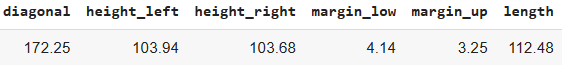
<!-- 1412 -->

In [14]:
dfknn = pd.read_csv("deteksi_uang_palsu.csv")
dfknn

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [15]:
import pandas as pd
import math

def euclidean_distance(row, target):
    distance = 0.0
    for i in range(len(row)):
        distance += (row[i] - target[i])**2
    return distance**0.5

df = pd.read_csv("deteksi_uang_palsu.csv")

target = {
    "diagonal": 172.25,
    "height_left": 103.94,
    "height_right": 103.68,
    "margin_low": 4.14,
    "margin_up": 3.25,
    "length": 112.48
}

target_values = list(target.values())

distances = []
for index, row in df.iterrows():
    distance = euclidean_distance(row[1:], target_values)
    distances.append(distance)

df["distance"] = distances

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length  distance  
0  113.02  0.671267  
1  113.74  1.458321  
2  113.12  0.834626  
3  113.30  0.910934  
4  113.46  1.312593  
5  110.94  2.421281 

In [16]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
print("Data terurut".center(50,'='))
dfsorted = df.sort_values(by="distance")
print(dfsorted)

#(K = akar 2 dari banyak data)
print("\n"+"Data terurut akar".center(50,'='))
K = round(math.sqrt(len(data)))
df_sorted = df.sort_values(by=["distance"]).head(K)

print(df_sorted)

===================Data terurut===================
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
7       False    171.90       104.33        104.40        4.70       3.31   
4        True    171.79       104.57        104.04        4.26       3.15   
1        True    171.66       103.68        103.41        4.35       3.33   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   
6       False    171.56       104.03        103.93        5.47       3.50   
5       False    172.00       104.23        104.52        5.76       3.37   

   length  distance  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  
7  112.12  1.

In [17]:
df.shape

(10, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    10 non-null     bool   
 1   diagonal      10 non-null     float64
 2   height_left   10 non-null     float64
 3   height_right  10 non-null     float64
 4   margin_low    10 non-null     float64
 5   margin_up     10 non-null     float64
 6   length        10 non-null     float64
 7   distance      10 non-null     float64
dtypes: bool(1), float64(7)
memory usage: 698.0 bytes


In [19]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Mengambil K-nearest neighbors terdekat
k_nearest_neighbors = df_sorted.head(K)

# Menghitung label terbanyak
predicted_label = k_nearest_neighbors['is_genuine'].mode()[0]

print("Prediksi untuk Label: ", predicted_label)


Prediksi untuk Label:  True


# (3) Analisis

> Nama : Michael Arselius Pamasi

> Nim : 2109116063


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## Business Understanding

### Penjelasan
Kumpulan data ini berisi informasi tentang harga berbagai mobil sport dari berbagai produsen. Dataset tersebut meliputi merek dan model mobil, tahun produksi, ukuran mesin, tenaga kuda, torsi, waktu 0-60 MPH, dan harga dalam USD. 
### Tujuan
Kumpulan data berguna untuk menganalisis harga berbagai mobil sport dan mengidentifikasi tren di pasar.


1. Car Make: Merek dari mobil sport yang merupakan perusahaan atau merek yang memproduksi mobil tersebut. Contoh merek mobil dalam dataset ini meliputi Porsche, Lamborghini, Ferrari, Audi, dan McLaren.

2. Car Model: Model dari mobil sport yang merepresentasikan versi atau varian tertentu dari mobil yang diproduksi oleh pabrikan. Contoh model mobil dalam dataset ini meliputi 911, Huracan, 488 GTB, R8, 720S, M8, AMG GT, Corvette, Mustang Shelby GT500, dan GT-R Nismo.

3. Year: Tahun produksi mobil sport, yang menunjukkan tahun model ketika mobil tersebut pertama kali diperkenalkan atau tersedia untuk dibeli.

4. Engine Size (L): Ukuran mesin mobil sport dalam liter, yang merepresentasikan volume dari silinder mesin. Ukuran mesin yang lebih besar biasanya menunjukkan daya dan performa yang lebih tinggi. Ukuran mesin dalam dataset ini berkisar dari 2.0L hingga 8.0L, dengan beberapa mobil memiliki motor listrik.

5. Horsepower: Tenaga kuda dari mobil sport, yang merepresentasikan daya keluaran mesin mobil. Tenaga kuda yang lebih tinggi biasanya menunjukkan akselerasi yang lebih cepat dan kecepatan maksimum yang lebih tinggi. Nilai tenaga kuda dalam dataset ini berkisar dari 300 hingga 1479.

6. Torque (lb-ft): Torsi dari mobil sport dalam pound-feet, yang merepresentasikan gaya rotasi yang dihasilkan oleh mesin. Nilai torsi yang lebih tinggi biasanya menunjukkan akselerasi yang lebih kuat dan penanganan yang lebih baik. Nilai torsi dalam dataset ini berkisar dari 270 hingga 1180.

7. 0-60 MPH Time (seconds): Waktu yang dibutuhkan oleh mobil sport untuk berakselerasi dari 0 hingga 60 mil per jam, yang merupakan ukuran umum dari akselerasi dan performa. Waktu 0-60 MPH yang lebih rendah biasanya menunjukkan akselerasi yang lebih cepat dan performa yang lebih baik. Waktu 0-60 MPH dalam dataset ini berkisar dari 1.85 hingga 5.3 detik.

8.  Price (in USD): Harga dari mobil sport dalam dolar AS, yang merepresentasikan biaya pembelian mobil tersebut. Harga dalam dataset ini berkisar dari $25,000 hingga $3,000,000.

In [53]:
dfcar = pd.read_csv("sport_car_price.csv")
dfcar

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


## Data Understanding

In [21]:
import numpy as np

In [22]:
dfcar.describe()

,Year
count,1007.000000
mean,2021.201589
std,2.019802
min,1965.000000
25%,2021.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


In [23]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


### Cleaning Data

In [24]:
dfcar.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [25]:
dfcar.columns = dfcar.columns.str.replace(' ', '_')

In [26]:
dfcar['Engine_Size_(L)'] = pd.to_numeric(dfcar['Engine_Size_(L)'], errors='coerce')
dfcar['Engine_Size_(L)'].fillna(dfcar['Engine_Size_(L)'].mean(), inplace=True)

In [27]:
dfcar.isnull().sum()

Car_Make                   0
Car_Model                  0
Year                       0
Engine_Size_(L)            0
Horsepower                 0
Torque_(lb-ft)             3
0-60_MPH_Time_(seconds)    0
Price_(in_USD)             0
dtype: int64

In [28]:
dfcar['Torque_(lb-ft)'] = pd.to_numeric(dfcar['Torque_(lb-ft)'], errors='coerce')
dfcar['Torque_(lb-ft)'].fillna(dfcar['Torque_(lb-ft)'].mean(), inplace=True)

In [29]:
dfcar.isnull().sum()

Car_Make                   0
Car_Model                  0
Year                       0
Engine_Size_(L)            0
Horsepower                 0
Torque_(lb-ft)             0
0-60_MPH_Time_(seconds)    0
Price_(in_USD)             0
dtype: int64

In [30]:
dfcar['Horsepower'].replace('1000+', np.nan, inplace=True)
dfcar.isnull().sum()

Car_Make                   0
Car_Model                  0
Year                       0
Engine_Size_(L)            0
Horsepower                 3
Torque_(lb-ft)             0
0-60_MPH_Time_(seconds)    0
Price_(in_USD)             0
dtype: int64

In [31]:
dfcar = dfcar.dropna()

In [32]:
dfcar.isnull().sum()

Car_Make                   0
Car_Model                  0
Year                       0
Engine_Size_(L)            0
Horsepower                 0
Torque_(lb-ft)             0
0-60_MPH_Time_(seconds)    0
Price_(in_USD)             0
dtype: int64

In [33]:
dfcar.loc[dfcar['Horsepower'].str.contains('\+|,'), 'Horsepower'] = np.nan

In [34]:
dfcar.isnull().sum()

Car_Make                   0
Car_Model                  0
Year                       0
Engine_Size_(L)            0
Horsepower                 6
Torque_(lb-ft)             0
0-60_MPH_Time_(seconds)    0
Price_(in_USD)             0
dtype: int64

In [35]:
dfcar = dfcar.dropna()

In [36]:
dfcar.isnull().sum()

Car_Make                   0
Car_Model                  0
Year                       0
Engine_Size_(L)            0
Horsepower                 0
Torque_(lb-ft)             0
0-60_MPH_Time_(seconds)    0
Price_(in_USD)             0
dtype: int64

In [37]:
dfcar['0-60_MPH_Time_(seconds)'] = dfcar['0-60_MPH_Time_(seconds)'].astype(float)
dfcar['Horsepower'] = dfcar['Horsepower'].astype(float)
dfcar['Price_(in_USD)'] = dfcar['Price_(in_USD)'].str.replace(',','').astype(float)

In [38]:
dfcar.isnull().sum()

Car_Make                   0
Car_Model                  0
Year                       0
Engine_Size_(L)            0
Horsepower                 0
Torque_(lb-ft)             0
0-60_MPH_Time_(seconds)    0
Price_(in_USD)             0
dtype: int64

In [39]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car_Make                 998 non-null    object 
 1   Car_Model                998 non-null    object 
 2   Year                     998 non-null    int64  
 3   Engine_Size_(L)          998 non-null    float64
 4   Horsepower               998 non-null    float64
 5   Torque_(lb-ft)           998 non-null    float64
 6   0-60_MPH_Time_(seconds)  998 non-null    float64
 7   Price_(in_USD)           998 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 70.2+ KB


### Explore Data

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Visualisasi Comparison

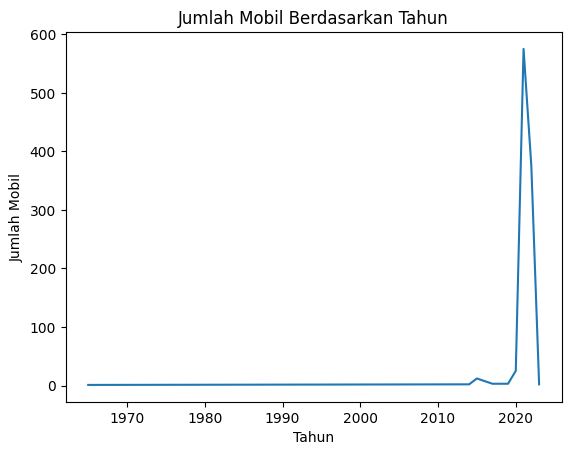

In [41]:
year = dfcar['Year']

jumlah_mobil = year.value_counts()

# urutkan data jumlah mobil
jumlah_mobil = jumlah_mobil.sort_index()

# plot data jumlah mobil
plt.plot(jumlah_mobil.index, jumlah_mobil.values)

# tambahkan judul
plt.title('Jumlah Mobil Berdasarkan Tahun')

# tambahkan label sumbu x dan y
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mobil')

# tampilkan plot
plt.show()

Text(0, 0.5, 'Jumlah Mobil')

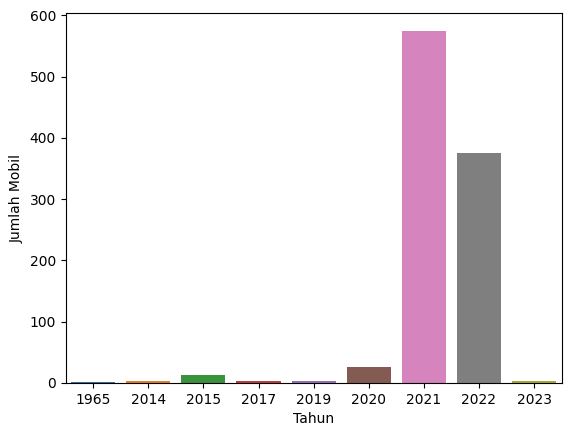

In [42]:
year = sns.countplot(x='Year', data=dfcar, )
year.set_xlabel("Tahun")
year.set_ylabel("Jumlah Mobil")

Visualisasi tersebut menunjukkan distribusi frekuensi jumlah mobil berdasarkan tahun pembuatan dengan rentang tahun pembuatan mobil dari sekitar tahun 1990an hingga 2020an. Mobil dengan tahun pembuatan di rentang 2000an memiliki jumlah terbanyak, sedangkan mobil dengan tahun pembuatan terbaru (2020an) jumlahnya masih relatif sedikit. 

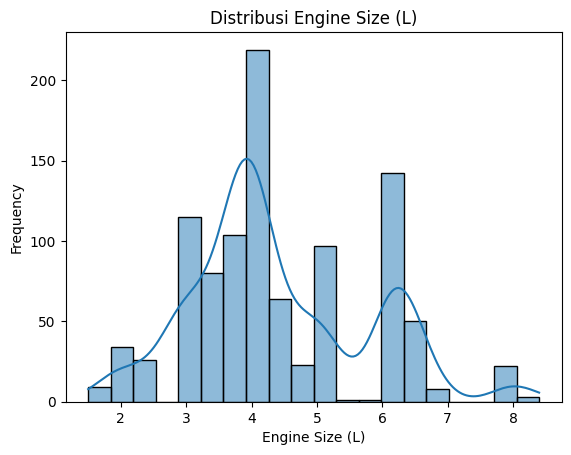

In [43]:
# Buat plot
sns.histplot(dfcar['Engine_Size_(L)'], kde=True, bins=20)

# Tambahkan judul dan label sumbu
plt.title('Distribusi Engine Size (L)')
plt.xlabel('Engine Size (L)')
plt.ylabel('Frequency')

# Tampilkan plot
plt.show()

Semakin tinggi nilai kepadatan pada suatu rentang nilai engine size, semakin sering nilai tersebut muncul dalam dataset.

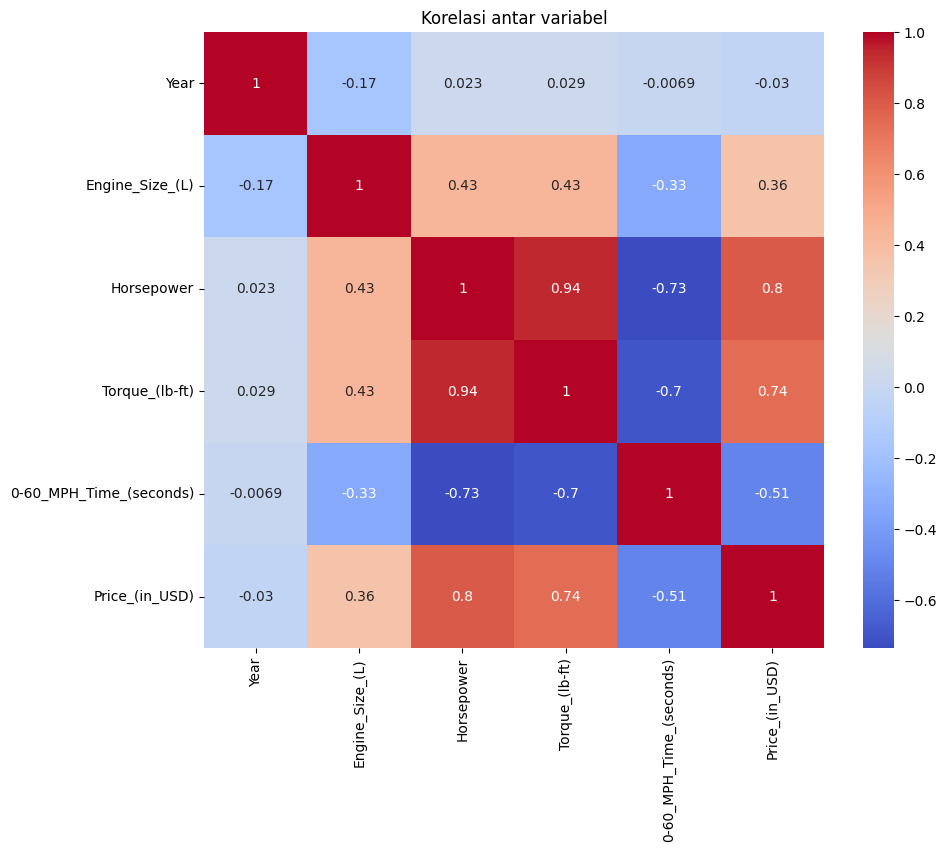

In [44]:
# drop kolom yang berisi object
df_numeric = dfcar.drop(['Car_Make', 'Car_Model'], axis=1)

# menghitung korelasi
corr = df_numeric.corr()

# membuat heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antar variabel')
plt.show()


Nilai korelasi antara -1 dan 1, dimana semakin dekat dengan 1 atau -1 maka korelasinya semakin kuat. Jika nilai korelasi mendekati 0, maka korelasinya lemah atau tidak ada korelasi.

## Data Preparation

#### Missing Value

In [45]:
dfcar.isnull().sum()

Car_Make                   0
Car_Model                  0
Year                       0
Engine_Size_(L)            0
Horsepower                 0
Torque_(lb-ft)             0
0-60_MPH_Time_(seconds)    0
Price_(in_USD)             0
dtype: int64

In [46]:
dfcar.dropna(inplace=True)
if dfcar.isnull().any().any():
    print("Ada nilai null/kosong pada dataset")
else:
    print("Tidak ada nilai null/kosong pada dataset")

Tidak ada nilai null/kosong pada dataset


#### Mengatasi Outlier

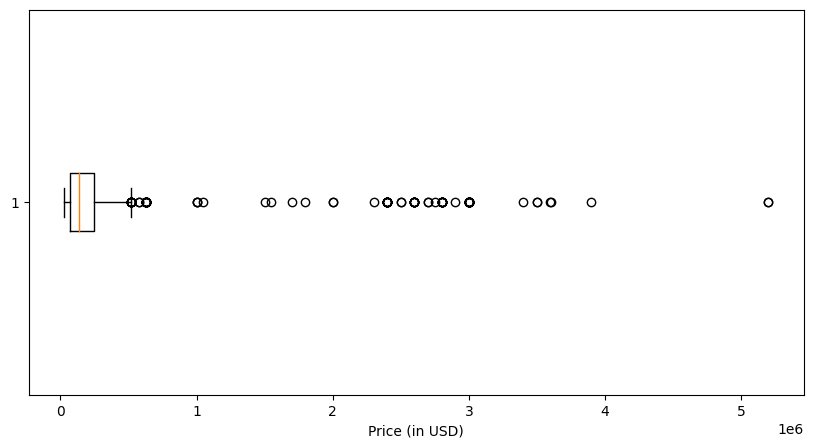

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.boxplot(dfcar['Price_(in_USD)'], vert=False)
ax.set_xlabel('Price (in USD)')
plt.show()

In [48]:
Q1 = dfcar['Price_(in_USD)'].quantile(0.25)
Q3 = dfcar['Price_(in_USD)'].quantile(0.75)
IQR = Q3 - Q1
IQR

178200.0

In [49]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [50]:
df_outlier = dfcar[(dfcar['Price_(in_USD)'] < lower_bound) | (dfcar['Price_(in_USD)'] > upper_bound)]
df_outlier

,Car_Make,Car_Model,Year,Engine_Size_(L),Horsepower,Torque_(lb-ft),0-60_MPH_Time_(seconds),Price_(in_USD)
11,Bugatti,Chiron,2021,8.000000,1500.0,1180.0,2.40,3000000.0
14,Koenigsegg,Jesko,2021,5.000000,1280.0,1015.0,2.50,2800000.0
24,Pagani,Huayra,2021,6.000000,720.0,737.0,2.80,2800000.0
26,Rimac,Nevera,2022,4.395781,1914.0,1696.0,1.85,2400000.0
28,Lamborghini,Aventador SVJ,2021,6.500000,759.0,531.0,2.80,517770.0
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5.000000,1280.0,1106.0,2.50,3000000.0
1003,Lotus,Evija,2021,4.395781,1972.0,1254.0,2.00,2000000.0
1004,McLaren,Senna,2021,4.000000,789.0,590.0,2.70,1000000.0
1005,Pagani,Huayra,2021,6.000000,764.0,738.0,3.00,2600000.0


In [51]:
df_no_outlier = dfcar[(~(dfcar['Price_(in_USD)'] < lower_bound) | (dfcar['Price_(in_USD)'] > upper_bound))]
df_no_outlier

,Car_Make,Car_Model,Year,Engine_Size_(L),Horsepower,Torque_(lb-ft),0-60_MPH_Time_(seconds),Price_(in_USD)
0,Porsche,911,2022,3.000000,379.0,331.0,4.00,101200.0
1,Lamborghini,Huracan,2021,5.200000,630.0,443.0,2.80,274390.0
2,Ferrari,488 GTB,2022,3.900000,661.0,561.0,3.00,333750.0
3,Audi,R8,2022,5.200000,562.0,406.0,3.20,142700.0
4,McLaren,720S,2021,4.000000,710.0,568.0,2.70,298000.0
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5.000000,1280.0,1106.0,2.50,3000000.0
1003,Lotus,Evija,2021,4.395781,1972.0,1254.0,2.00,2000000.0
1004,McLaren,Senna,2021,4.000000,789.0,590.0,2.70,1000000.0
1005,Pagani,Huayra,2021,6.000000,764.0,738.0,3.00,2600000.0


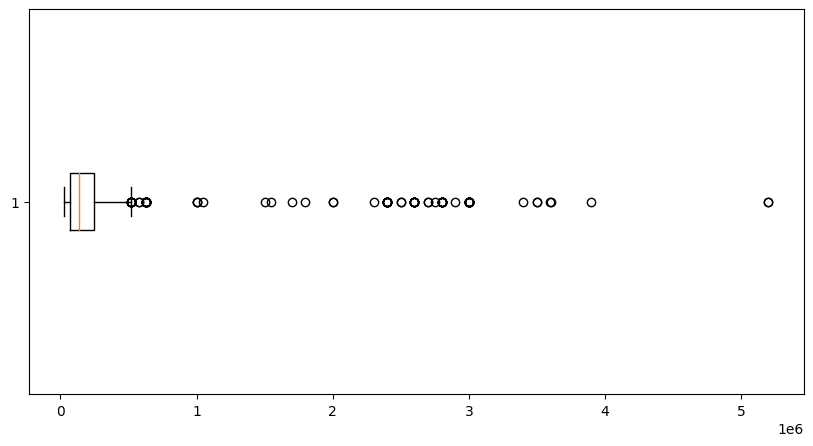

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.boxplot(df_no_outlier['Price_(in_USD)'], vert=False)
plt.show()